# Multiple Linear Regression

<img src='q.png' />


<img src='w.png' />



<img src='e.png' />

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

C:\Users\himan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('IPL IMB381IPL2013.csv')

df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
xfeatures = df.columns

xfeatures

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [5]:
xfeatures = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

## Feature encoding on categorical features

In [6]:
df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [7]:
pd.get_dummies(df['PLAYING ROLE'])[:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [8]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

encoded_df = pd.get_dummies(df[xfeatures],
                           columns=categorical_features,
                           drop_first=True)

encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [9]:
xfeatures = encoded_df.columns

encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

x = sm.add_constant(encoded_df)
y = df['SOLD PRICE']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, 
                                                random_state=100)

In [11]:
model1 = sm.OLS(ytrain, xtrain).fit()

model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            0.366     
Dependent Variable:         SOLD PRICE              AIC:                       2963.5554 
Date:                       2024-03-14 20:33        BIC:                       3048.1760 
No. Observations:           104                     Log-Likelihood:            -1449.8   
Df Model:                   31                      F-statistic:               2.921     
Df Residuals:               72                      Prob (F-statistic):        9.52e-05  
R-squared:                  0.557                   Scale:                     1.0852e+11
-----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                   379305.9641 227526.1170  1.6671 0.0998   -74259.0605  832870.9888
T-RUNS                     -36.5141     32.1190 -1.1368 0.2594     -100.5422      27.5139
T-WKTS                    -461.0001    607.6529 -0.7587 0.4505    -1672.3340     750.3339
ODI-RUNS-S                  31.6404     36.2714  0.8723 0.3859      -40.6653     103.9460
ODI-SR-B                   432.0709   1676.0907  0.2578 0.7973    -2909.1549    3773.2967
ODI-WKTS                  1429.4361    822.9541  1.7370 0.0867     -211.0928    3069.9651
ODI-SR-BL                 -918.2433   1542.6974 -0.5952 0.5536    -3993.5544    2157.0678
RUNS-S                     112.0031    163.7830  0.6839 0.4963     -214.4923     438.4985
HS                       -4358.4779   2725.4224 -1.5992 0.1142    -9791.5082    1074.5524
AVE                      10503.0460   7934.8283  1.3237 0.1898    -5314.7452   26320.8372
SR-B                      -940.2624   1351.5040 -0.6957 0.4888    -3634.4363    1753.9115
SIXERS                    5721.0956   3401.7834  1.6818 0.0969    -1060.2356   12502.4269
RUNS-C                      75.4750    343.0889  0.2200 0.8265     -608.4602     759.4103
WKTS                      2473.3852   8545.3019  0.2894 0.7731   -14561.3628   19508.1331
AVE-BL                   11303.6479  10009.4045  1.1293 0.2625    -8649.7353   31257.0311
ECON                     -7058.9195  12535.5812 -0.5631 0.5751   -32048.1439   17930.3049
SR-BL                   -13960.7590  13697.5259 -1.0192 0.3115   -41266.2779   13344.7599
AGE_2                  -161939.8645 116415.3395 -1.3911 0.1685  -394009.6024   70129.8734
AGE_3                  -236847.4939 162592.4540 -1.4567 0.1495  -560969.6270   87274.6393
COUNTRY_BAN            -371957.3826 441011.9187 -0.8434 0.4018 -1251098.5747  507183.8096
COUNTRY_ENG             557381.4990 239916.6953  2.3232 0.0230    79116.3080 1035646.6900
COUNTRY_IND              18606.9052 127075.2150  0.1464 0.8840  -234712.9061  271926.7164
COUNTRY_NZ               58916.6513 175281.3894  0.3361 0.7378  -290500.4123  408333.7150
COUNTRY_PAK            -103292.3294 194949.9418 -0.5298 0.5979  -491917.9357  285333.2769
COUNTRY_SA             -138449.0740 135810.2910 -1.0194 0.3114  -409181.9409  132283.7929
COUNTRY_SL              -98603.0089 161123.0811 -0.6120 0.5425  -419796.0006  222589.9829
COUNTRY_WI             -347891.6839 213858.6160 -1.6267 0.1082  -774211.0433   78427.6755
COUNTRY_ZIM            -379870.1688 402326.7449 -0.9442 0.3482 -1181893.8765  422153.5389
PLAYING ROLE_Batsman    176751.1834 134779.1192  1.3114 0.1939   -91926.0801  445428.4470
PLAYING ROLE_Bowler      39307.2285 120109.8645  0.3273 0.7444  -200127.4105  278741.8674
PLAYING ROLE_W. Keeper   57471.1051 191731.9099  0.2997 0.7652  -324739.4718  439681.6820
CAPTAINCY EXP_1         251613.1550 132342.6280  1.9012 0.0613   -12207.0522  515433.3621
--------------------

# Linear Regression Part 2 - Day 9 

# multicollinearity

<img src='ee.png' />


# VIF (Variance Inflation Factor)

<img src='rr.png' />

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_score(x):
    xmatrix = x.values
    vif = [variance_inflation_factor(xmatrix, i) for i in range(xmatrix.shape[1])]
    
    vif_factor = pd.DataFrame()
    vif_factor['Column_Names'] = x.columns
    vif_factor['VIF'] = vif
    
    return vif_factor

In [13]:
vif_factor = get_vif_score(x[xfeatures])

vif_factor

,Column_Names,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [14]:
columns_with_large_vif = vif_factor[vif_factor.VIF > 4].Column_Names

In [15]:
x[columns_with_large_vif].corr()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,COUNTRY_IND,PLAYING ROLE_Batsman,CAPTAINCY EXP_1
T-RUNS,1.000000,0.026285,0.892823,0.231411,0.045505,0.067700,0.410143,0.411209,0.374046,0.114298,0.216571,-0.253083,-0.277157,-0.298999,-0.329022,-0.309105,-0.266649,-0.179278,0.384422,0.690647
T-WKTS,0.026285,1.000000,-0.088276,0.012052,0.822940,0.060641,-0.218544,-0.268432,-0.265540,-0.147752,-0.198036,0.297302,0.289735,0.162456,0.117530,0.205208,-0.178391,-0.147490,-0.276450,0.088782
ODI-RUNS-S,0.892823,-0.088276,1.000000,0.319264,0.056554,0.126795,0.523955,0.495765,0.446280,0.194111,0.376012,-0.268950,-0.302745,-0.225109,-0.249795,-0.237517,-0.242422,-0.168224,0.367995,0.714058
ODI-SR-B,0.231411,0.012052,0.319264,1.000000,0.160114,0.284584,0.306338,0.360086,0.340327,0.375371,0.320041,0.004855,-0.022502,0.018958,-0.019067,0.017522,-0.011977,-0.168609,0.083485,0.291373
ODI-WKTS,0.045505,0.822940,0.056554,0.160114,1.000000,0.124361,-0.198101,-0.209109,-0.222062,-0.030404,-0.148722,0.327122,0.302466,0.217302,0.230221,0.259800,-0.125708,-0.187669,-0.358824,0.077536
ODI-SR-BL,0.067700,0.060641,0.126795,0.284584,0.124361,1.000000,-0.027772,-0.067615,-0.053766,-0.051684,-0.033616,0.196887,0.151594,0.416627,0.313295,0.402495,-0.133908,-0.022494,-0.014689,0.103315
RUNS-S,0.410143,-0.218544,0.523955,0.306338,-0.198101,-0.027772,1.000000,0.834631,0.767023,0.380022,0.866213,-0.160762,-0.220959,-0.101818,-0.179459,-0.118567,-0.085762,0.209292,0.418555,0.352422
HS,0.411209,-0.268432,0.495765,0.360086,-0.209109,-0.067615,0.834631,1.000000,0.876249,0.531028,0.788439,-0.235327,-0.291494,-0.176049,-0.254494,-0.192990,-0.022883,-0.034029,0.408826,0.392749
AVE,0.374046,-0.265540,0.446280,0.340327,-0.222062,-0.053766,0.767023,0.876249,1.000000,0.583579,0.705365,-0.278482,-0.343958,-0.120430,-0.202301,-0.140809,0.031758,-0.037809,0.432485,0.378271
SR-B,0.114298,-0.147752,0.194111,0.375371,-0.030404,-0.051684,0.380022,0.531028,0.583579,1.000000,0.425394,-0.063179,-0.069823,-0.057895,-0.076228,-0.068248,0.181181,-0.049031,0.157903,0.176919


Text(0.5, 1.0, 'Correlation Between Features')

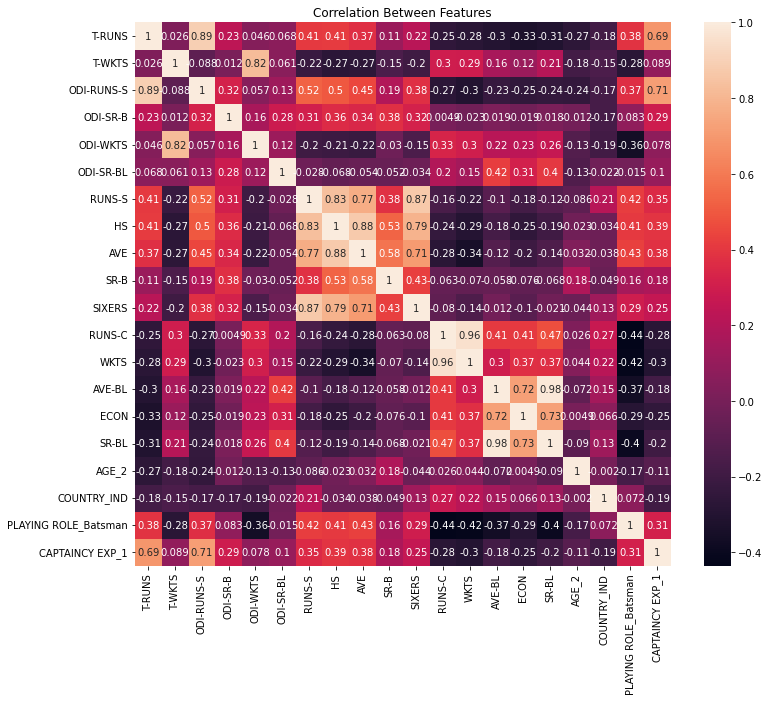

In [16]:
# correlation matrix

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,10))

sn.heatmap(x[columns_with_large_vif].corr(), annot=True)

plt.title('Correlation Between Features')

In [17]:
columns_to_be_removed = [
    'T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B',
    'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'
]

xnewfeatures = list( set(xfeatures) - set(columns_to_be_removed) )

xnewfeatures

['PLAYING ROLE_W. Keeper',
 'WKTS',
 'COUNTRY_WI',
 'COUNTRY_SA',
 'ODI-SR-BL',
 'PLAYING ROLE_Batsman',
 'COUNTRY_IND',
 'COUNTRY_NZ',
 'CAPTAINCY EXP_1',
 'AGE_3',
 'COUNTRY_ENG',
 'PLAYING ROLE_Bowler',
 'SIXERS',
 'COUNTRY_PAK',
 'COUNTRY_BAN',
 'COUNTRY_ZIM',
 'ODI-WKTS',
 'COUNTRY_SL']

In [18]:
get_vif_score(x[xnewfeatures])

,Column_Names,VIF
0,PLAYING ROLE_W. Keeper,1.900941
1,WKTS,2.883101
2,COUNTRY_WI,1.194093
3,COUNTRY_SA,1.416657
4,ODI-SR-BL,2.822148
5,PLAYING ROLE_Batsman,2.680207
6,COUNTRY_IND,3.144668
7,COUNTRY_NZ,1.173418
8,CAPTAINCY EXP_1,2.458745
9,AGE_3,1.779861


In [19]:
xtrain = xtrain[xnewfeatures]

model2 = sm.OLS(ytrain, xtrain).fit()

model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.751     
Dependent Variable:         SOLD PRICE         AIC:                           2955.6800 
Date:                       2024-03-14 21:08   BIC:                           3003.2791 
No. Observations:           104                Log-Likelihood:                -1459.8   
Df Model:                   18                 F-statistic:                   18.40     
Df Residuals:               86                 Prob (F-statistic):            3.42e-22  
R-squared (uncentered):     0.794              Scale:                         1.1025e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
PLAYING ROLE_W. Keeper   49274.2777 149140.5199  0.3304 0.7419 -247207.2632  345755.8187
WKTS                      2490.4112   2002.7883  1.2435 0.2171   -1491.0002    6471.8225
COUNTRY_WI             -317999.5597 189473.8140 -1.6783 0.0969 -694661.0358   58661.9164
COUNTRY_SA              -18898.3844 109336.1535 -0.1728 0.8632 -236251.4638  198454.6951
ODI-SR-BL                 1049.6000   1214.0575  0.8645 0.3897   -1363.8665    3463.0664
PLAYING ROLE_Batsman    190555.5054 100263.0579  1.9006 0.0607   -8760.8570  389871.8678
COUNTRY_IND             182679.8666  91263.0641  2.0017 0.0485    1254.8997  364104.8335
COUNTRY_NZ              117079.4062 146718.0219  0.7980 0.4271 -174586.3681  408745.1805
CAPTAINCY EXP_1         221094.8363  89788.5884  2.4624 0.0158   42601.0302  399588.6425
AGE_3                  -109040.0850 102303.8279 -1.0658 0.2895 -312413.3638   94333.1938
COUNTRY_ENG             631100.7833 207450.8310  3.0422 0.0031  218702.1803 1043499.3864
PLAYING ROLE_Bowler      64912.6434  98067.8958  0.6619 0.5098 -130039.8811  259865.1679
SIXERS                    7701.7080   1824.8214  4.2205 0.0001    4074.0831   11329.3330
COUNTRY_PAK              52117.1973 152202.5277  0.3424 0.7329 -250451.4137  354685.8083
COUNTRY_BAN            -239329.6394 349682.8594 -0.6844 0.4956 -934476.1568  455816.8780
COUNTRY_ZIM            -191451.7941 371965.3404 -0.5147 0.6081 -930894.4178  547990.8297
ODI-WKTS                   999.7407    392.1150  2.5496 0.0126     220.2419    1779.2396
COUNTRY_SL               -3433.7053 138084.0718 -0.0249 0.9802 -277935.7550  271068.3443
----------------------------------------------------------------------------------------
Omnibus:                     11.754               Durbin-Watson:                  1.700 
Prob(Omnibus):               0.003                Jarque-Bera (JB):               12.215
Skew:                        0.752                Prob(JB):                       0.002 
Kurtosis:                    3.745                Condition No.:                  1596  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [20]:
significant_variables = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 
                         'CAPTAINCY EXP_1', 'ODI-WKTS']

model3 = sm.OLS(ytrain, xtrain[significant_variables]).fit()

model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.750     
Dependent Variable:     SOLD PRICE       AIC:                         2944.7114 
Date:                   2024-03-14 21:12 BIC:                         2957.9334 
No. Observations:       104              Log-Likelihood:              -1467.4   
Df Model:               5                F-statistic:                 63.32     
Df Residuals:           99               Prob (F-statistic):          2.64e-29  
R-squared (uncentered): 0.762            Scale:                       1.1066e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       335616.2858  57434.0837 5.8435 0.0000 221654.6033  449577.9682
COUNTRY_ENG       721624.4912 196388.6881 3.6745 0.0004 331946.7271 1111302.2552
SIXERS              8058.6485   1379.8657 5.8402 0.0000   5320.6956   10796.6015
CAPTAINCY EXP_1   279859.6369  70655.1222 3.9609 0.0001 139664.5457  420054.7281
ODI-WKTS            1108.3167    266.3546 4.1611 0.0001    579.8114    1636.8220
--------------------------------------------------------------------------------
Omnibus:                   5.938             Durbin-Watson:                1.686
Prob(Omnibus):             0.051             Jarque-Bera (JB):             5.348
Skew:                      0.522             Prob(JB):                     0.069
Kurtosis:                  3.382             Condition No.:                800  
================================================================================

"""

In [ ]:
# Regularization

- Lasso (L1 regularization)
- Ridge (L2 regularization)